# Initialize

In [103]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from warnings import filterwarnings
filterwarnings('ignore')

from functools import reduce
from glob import glob
from collections import deque

In [88]:
pwd = os.getcwd()
gp_path = pwd.split('EDA')[0][:-1]
raw_path = glob(f'{gp_path}\\**\\merge_dataset\\raw*.csv', recursive=True)[0]
tag_path = glob(f'{gp_path}\\**\\merge_dataset\\tag*.csv', recursive=True)[0]

print(raw_path, tag_path, sep='\n\n')

c:\Users\NT550-045\Desktop\ml2\web_crawling\merge_dataset\raw_merge.csv

c:\Users\NT550-045\Desktop\ml2\web_crawling\merge_dataset\tag_merge.csv


# Load & Preprocessing Data

In [89]:
raw = pd.read_csv(raw_path, sep='\t')

In [90]:
raw['genre'].unique()

array(['Indie, Simulation, Strategy', 'Strategy',
       'Action, Adventure, Indie', ...,
       'Adventure, Casual, Massively Multiplayer, RPG, Simulation, Strategy',
       'Action, Adventure, Free to Play, Indie, Massively Multiplayer, Racing, RPG, Early Access',
       'Action, Massively Multiplayer, RPG, Simulation, Early Access'],
      dtype=object)

# One-Hot Method

In [91]:
genre_set = reduce(lambda x,y : x|y, raw['genre'].apply(lambda x : set(str(x).replace(' ', '').split(','))))

In [92]:
print(len(genre_set))

genre_dict = {genre : deque([0 for i in range(len(raw))])for genre in genre_set}

35


In [93]:
raw['genre_set'] = raw['genre'].apply(lambda x : set(str(x).replace(' ', '').split(',')))

In [94]:
for idx in range(len(raw)):
    for genre in raw.loc[idx,'genre_set']:
        genre_dict[genre][idx] = 1

In [95]:
genre_dict['appid'] = raw['appid']

In [96]:
genre_df = pd.DataFrame(genre_dict)
genre_df = genre_df[genre_df.columns.to_list()[-1:]+ genre_df.columns.to_list()[:-1]]

## Genre Col Cluster-Kmeans

In [97]:
from sklearn.cluster import KMeans

In [ ]:
# Basic
# k_m = KMeans(n_clusters= 3, random_state=1234)
# genre_df['cluster'] = k_m.fit_predict(genre_df.drop(['appid'], axis=1))

## Elbow_Method

KElbowVisualizer(ax=<Axes: >,
                 estimator=KMeans(n_clusters=35, random_state=1234), k=(2, 36))

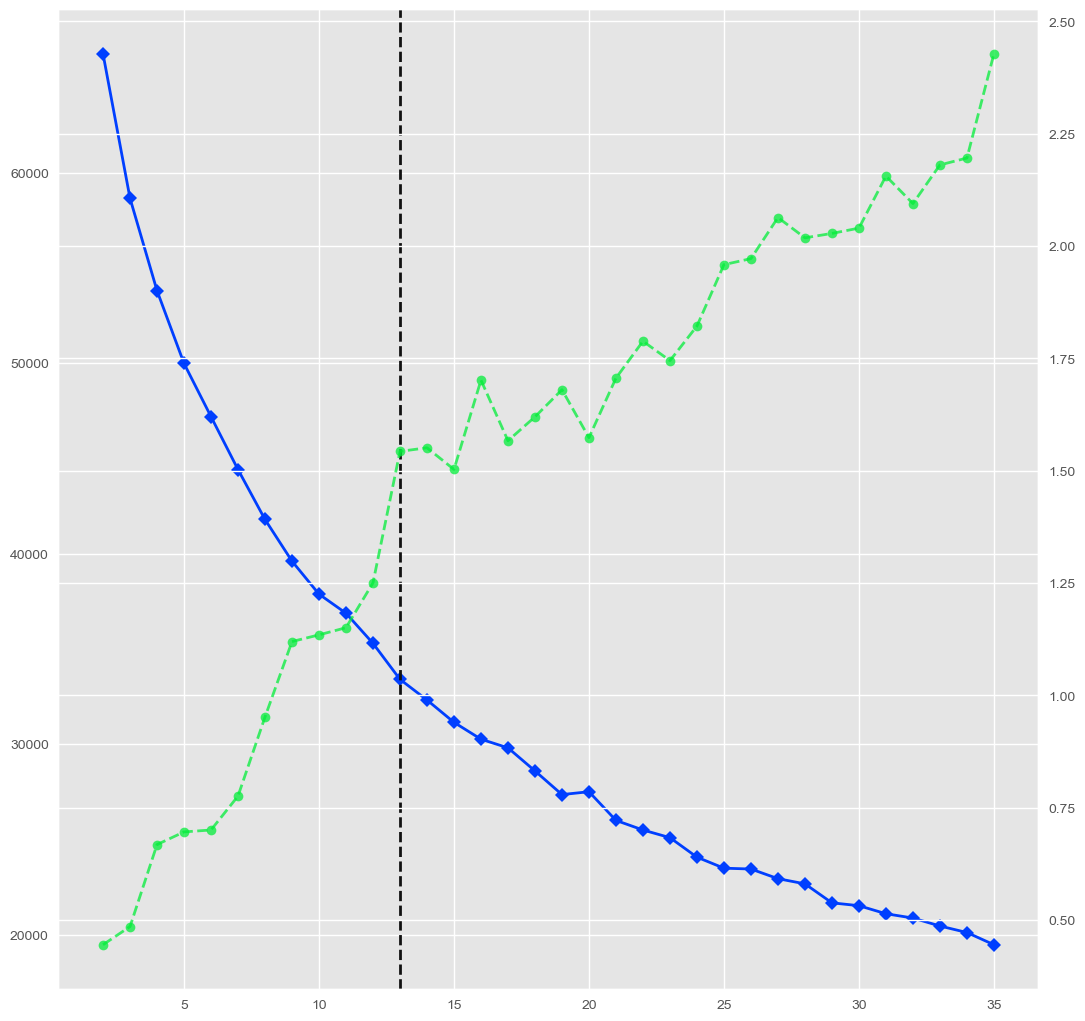

In [106]:
from yellowbrick.cluster import KElbowVisualizer


plt.figure(figsize=(10,10))
e_k_m  = KMeans(random_state=1234)
visualizer = KElbowVisualizer(e_k_m, k=(2,36))
visualizer.fit(genre_df.drop(['appid'], axis=1))

In [107]:
print(visualizer.elbow_score_)
print(visualizer.elbow_value_)

33398.059327087576
13


## Silhouette_Score

In [108]:
from sklearn.metrics import silhouette_score

silhouette_list = []

for i in range(2, 36):
    print(f'cluster : {i}')
    k_m = KMeans(n_clusters=i, random_state=1234)
    k_m.fit(genre_df.drop(['appid'], axis=1))
    labels = k_m.labels_
    silhouette = silhouette_score(genre_df.drop(['appid'], axis=1), labels, metric='euclidean')
    silhouette_list.append(silhouette)

cluster : 2
cluster : 3
cluster : 4
cluster : 5
cluster : 6
cluster : 7
cluster : 8
cluster : 9
cluster : 10
cluster : 11
cluster : 12
cluster : 13
cluster : 14
cluster : 15
cluster : 16
cluster : 17
cluster : 18
cluster : 19
cluster : 20
cluster : 21
cluster : 22
cluster : 23
cluster : 24
cluster : 25
cluster : 26
cluster : 27
cluster : 28
cluster : 29
cluster : 30
cluster : 31
cluster : 32
cluster : 33
cluster : 34
cluster : 35


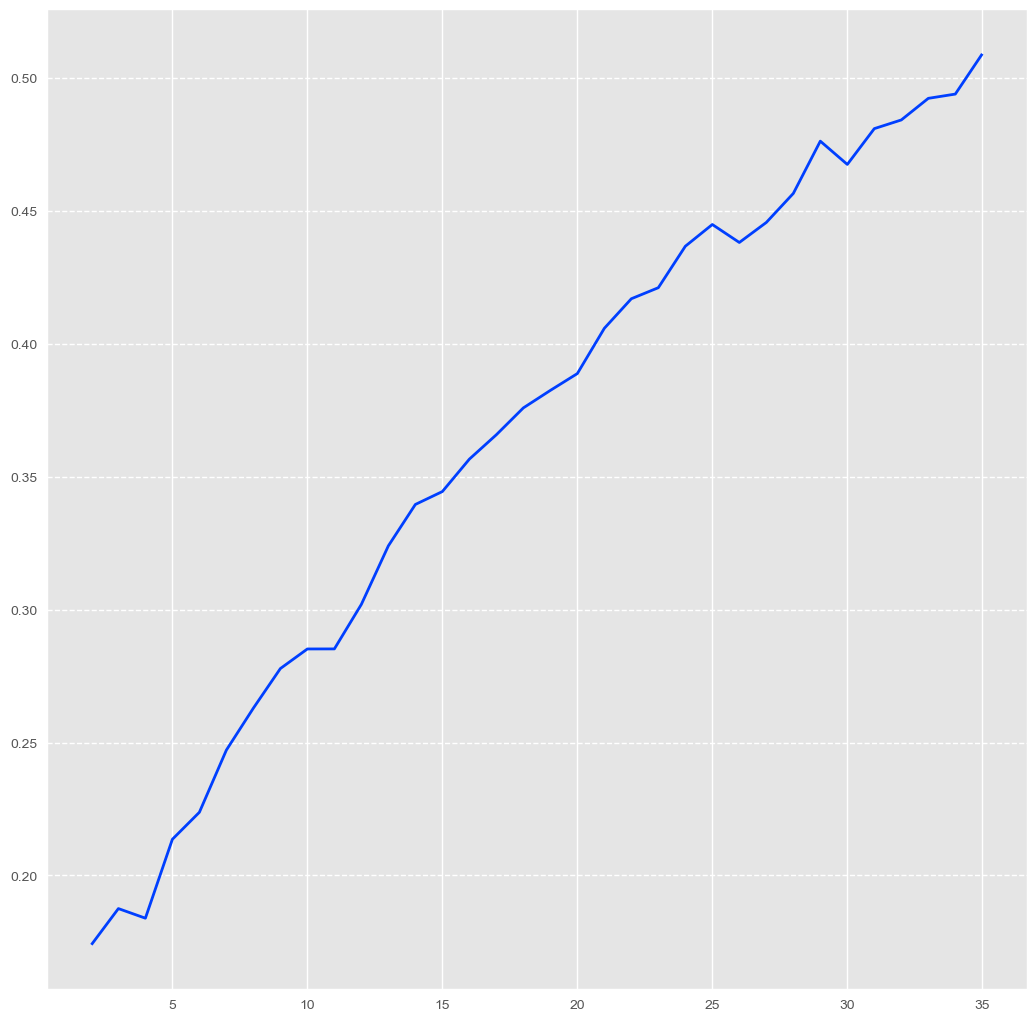

In [109]:
plt.style.use(['seaborn-v0_8-bright'])

plt.figure(figsize=(10,10))
plt.plot(range(2,36), silhouette_list)
plt.grid(True , axis = 'y', linestyle='--')
plt.show()

In [111]:
k_m = KMeans(n_clusters=13, random_state=1234)
genre_df['cluster'] = k_m.fit_predict(genre_df.drop(['appid'], axis=1))

In [116]:
genre_df['genre_set'] = raw['genre_set']
genre_df['genre'] = raw['genre']

In [ ]:
for label in k_m.labels_:
    print(len(genre_df[genre_df['cluster'] == label]['genre'].unique()))

In [189]:
import numpy as np

for label in np.unique(k_m.labels_):
    print(f"cluster : {label} / unique : {len(genre_df[genre_df['cluster'] == label]['genre'].unique())}")
    print(genre_df[genre_df['cluster'] == label]['genre'].value_counts()[:10])
    
    print()

cluster : 0 / unique : 60
Indie                                 1536
Indie, Strategy                        446
RPG                                    419
Indie, RPG                             371
Indie, RPG, Strategy                   182
Free to Play, Indie                     81
Indie, RPG, Simulation                  81
Indie, RPG, Strategy, Early Access      51
Indie, Racing                           47
Free to Play                            46
Name: genre, dtype: int64

cluster : 1 / unique : 72
Adventure, Casual, Indie                   1546
Adventure, Casual                           586
Adventure, Casual, Indie, RPG               335
Adventure, Casual, Indie, Strategy          154
Adventure, Casual, Indie, RPG, Strategy     132
Adventure, Casual, Free to Play, Indie       89
Adventure, Casual, Simulation                80
Adventure, Casual, Indie, Early Access       66
Adventure, Casual, Strategy                  50
Adventure, Casual, RPG                       44
Name: genre

In [190]:
genre_df.head(1).T

,0
appid,294100
Indie,1
Animation&Modeling,0
MassivelyMultiplayer,0
N,0
WebPublishing,0
PhotoEditing,0
Adventure,0
RPG,0
Racing,0


In [193]:
genre_df[genre_df.columns[:-1]].to_csv('./model/one_hot_genre.csv', index=False)